# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from base_models import BaseModel
from model_creator import Optimizer, MTLApproach
from model_evaluator import DataSource, DataPredSelection

 ==> Restrict GPU memory growth: True


# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for ALL requisites - 50 epochs - using second approach of handcrafted method,' + \
            'which splits the ICAO reqs and its branches into previously determined groups. Removing rotation from operations of data augmentation' + \
            ' and using minor shift (width and height).',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl', '50 epochs', 'handcrafted_2'],
        'src_files': ["src/**/*.py"]
    },
    'properties': {
        'mtl_approach': MTLApproach.HAND_2,
        'reqs': list(cts.ICAO_REQ),
        'aligned': False,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 32,
        'n_epochs': 2,
        'early_stopping': 50,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 90158
Process ID: 100330
---------------------------
-----
Use Neptune:  False
-----
-------------------
Args: 
{'exp_params': {'description': 'Training mtl network for ALL requisites - 50 '
                               'epochs - using second approach of handcrafted '
                               'method,which splits the ICAO reqs and its '
                               'branches into previously determined groups. '
                               'Removing rotation from operations of data '
                               'augmentation and using minor shift (width and '
                               'height).',
                'name': 'train_vgg16',
                'src_files': ['src/**/*.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'mtl',
                         '50 epochs',


# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Not using Neptune


# Labels Distribution

In [9]:
runner.summary_labels_dist()

-------------------- summary labels dist -------------------
Requisite: MOUTH
N_TRAIN_COMP: 3607 (73.19%)
N_TRAIN_NOT_COMP: 1321 (26.81%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 420 (76.78%)
N_VALIDATION_NOT_COMP: 127 (23.22%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 215 (74.65%)
N_TEST_NOT_COMP: 73 (25.35%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: ROTATION
N_TRAIN_COMP: 3716 (75.41%)
N_TRAIN_NOT_COMP: 1212 (24.59%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 410 (74.95%)
N_VALIDATION_NOT_COMP: 137 (25.05%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 208 (72.22%)
N_TEST_NOT_COMP: 80 (27.78%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: L_AWAY
N_TRAIN_COMP: 3375 (68.49%)
N_TRAIN_NOT_COMP: 1553 (31.51%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 382 (69.84%)
N_VALIDATION_NOT_COMP: 165 (30.16%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 201 (69.79%)
N_TEST_NOT_COMP: 87 (30.21%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: EYES_CLOSED
N_TRAIN_COMP: 3887 (78.88%)
N_TRAIN_NOT_COMP: 1041 (21.12%)
N_TRAIN_D

# Create Model

In [10]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

-------------------- vizualize model -------------------


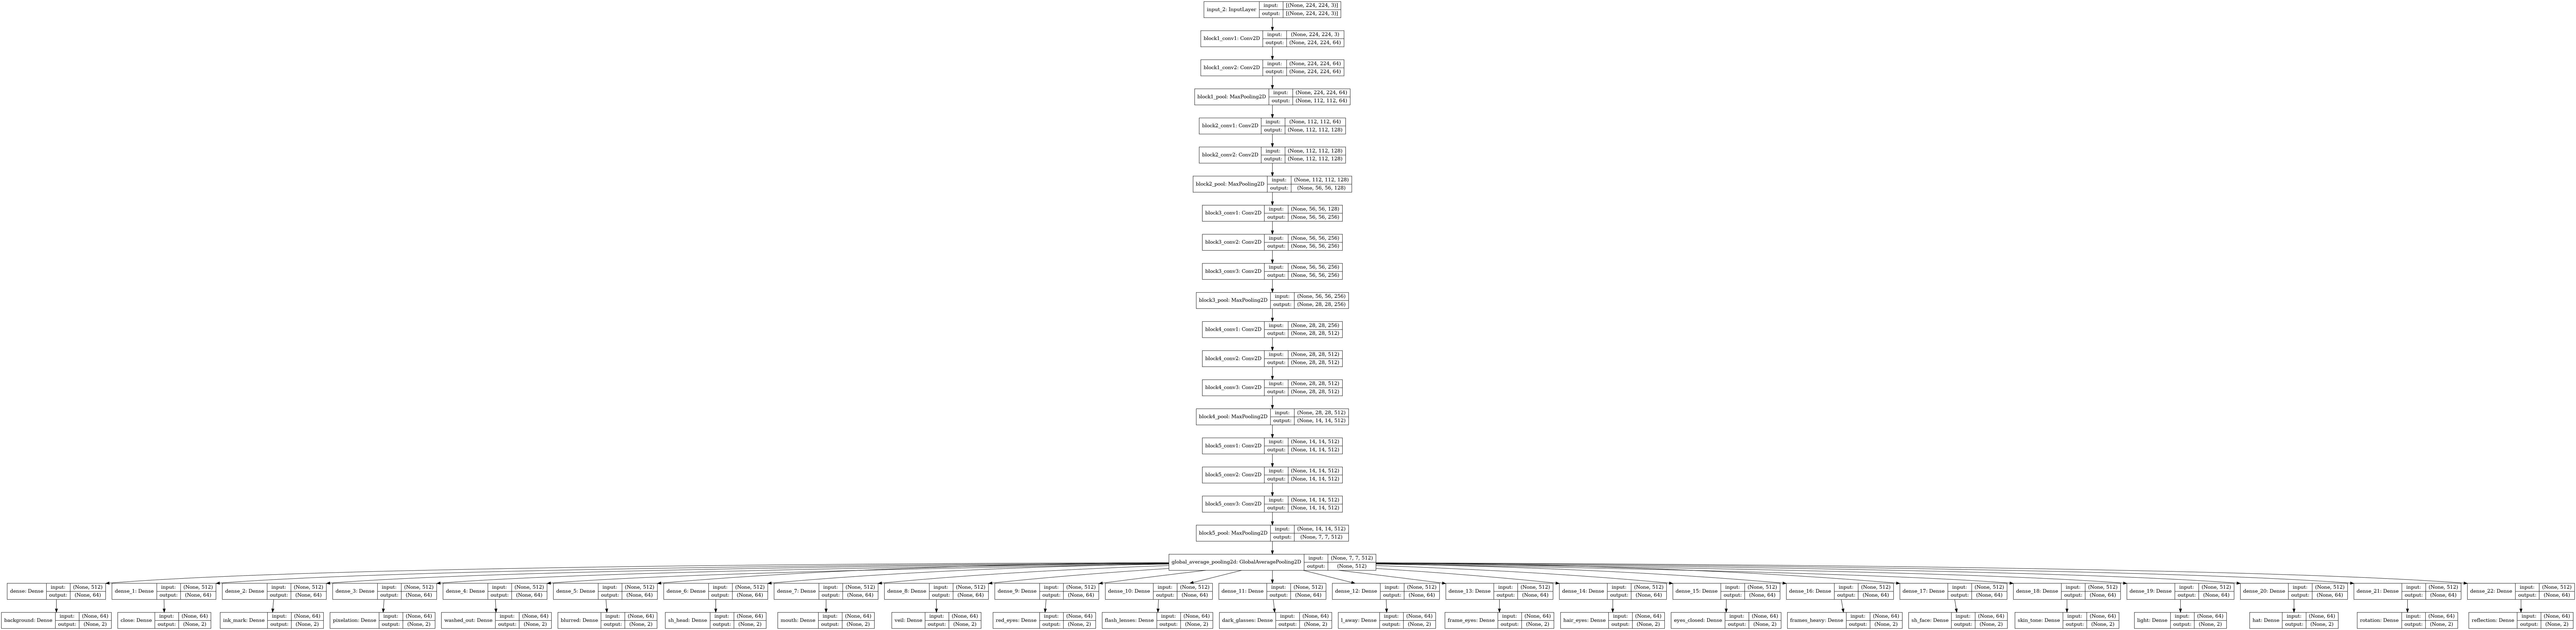

In [11]:
runner.vizualize_model(outfile_path=f"figs/handcrafted_mtl_model_2.png")

In [12]:
runner.model_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Training Model

In [13]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
 .. Not fine tuning base model...
  .. Total params: 15,472,814
  .. Trainable params: 758,126
  .. Non-trainable params: 14,714,688
Epoch 1/2
154/154 [==============================] - 350s 2s/step - loss: 1.2865 - background_loss: 0.7187 - close_loss: 0.6951 - ink_mark_loss: 0.7742 - pixelation_loss: 0.6221 - washed_out_loss: 0.1058 - blurred_loss: 0.5002 - sh_head_loss: 0.9347 - mouth_loss: 0.0576 - veil_loss: 0.6979 - red_eyes_loss: 0.5826 - flash_lenses_loss: 0.4553 - dark_glasses_loss: 0.8318 - l_away_loss: 0.6269 - frame_eyes_loss: 0.7463 - hair_eyes_loss: 0.8353 - eyes_closed_loss: 0.4037 - frames_heavy_loss: 0.0229 - sh_face_loss: 0.7719 - skin_tone_loss: 0.0925 - light_loss: 0.3098 - hat_loss: 0.5223 - rotation_loss: 0.8506 - reflection_loss: 0.7064 - background_accuracy: 0.7263 - close_accuracy: 0.7439 - ink_mark_accuracy: 0.6733 - pixelation_accuracy: 0.7788 - washed_out_accuracy: 0.9828 - blurred_a

# Plots

-------------------- draw training history -------------------


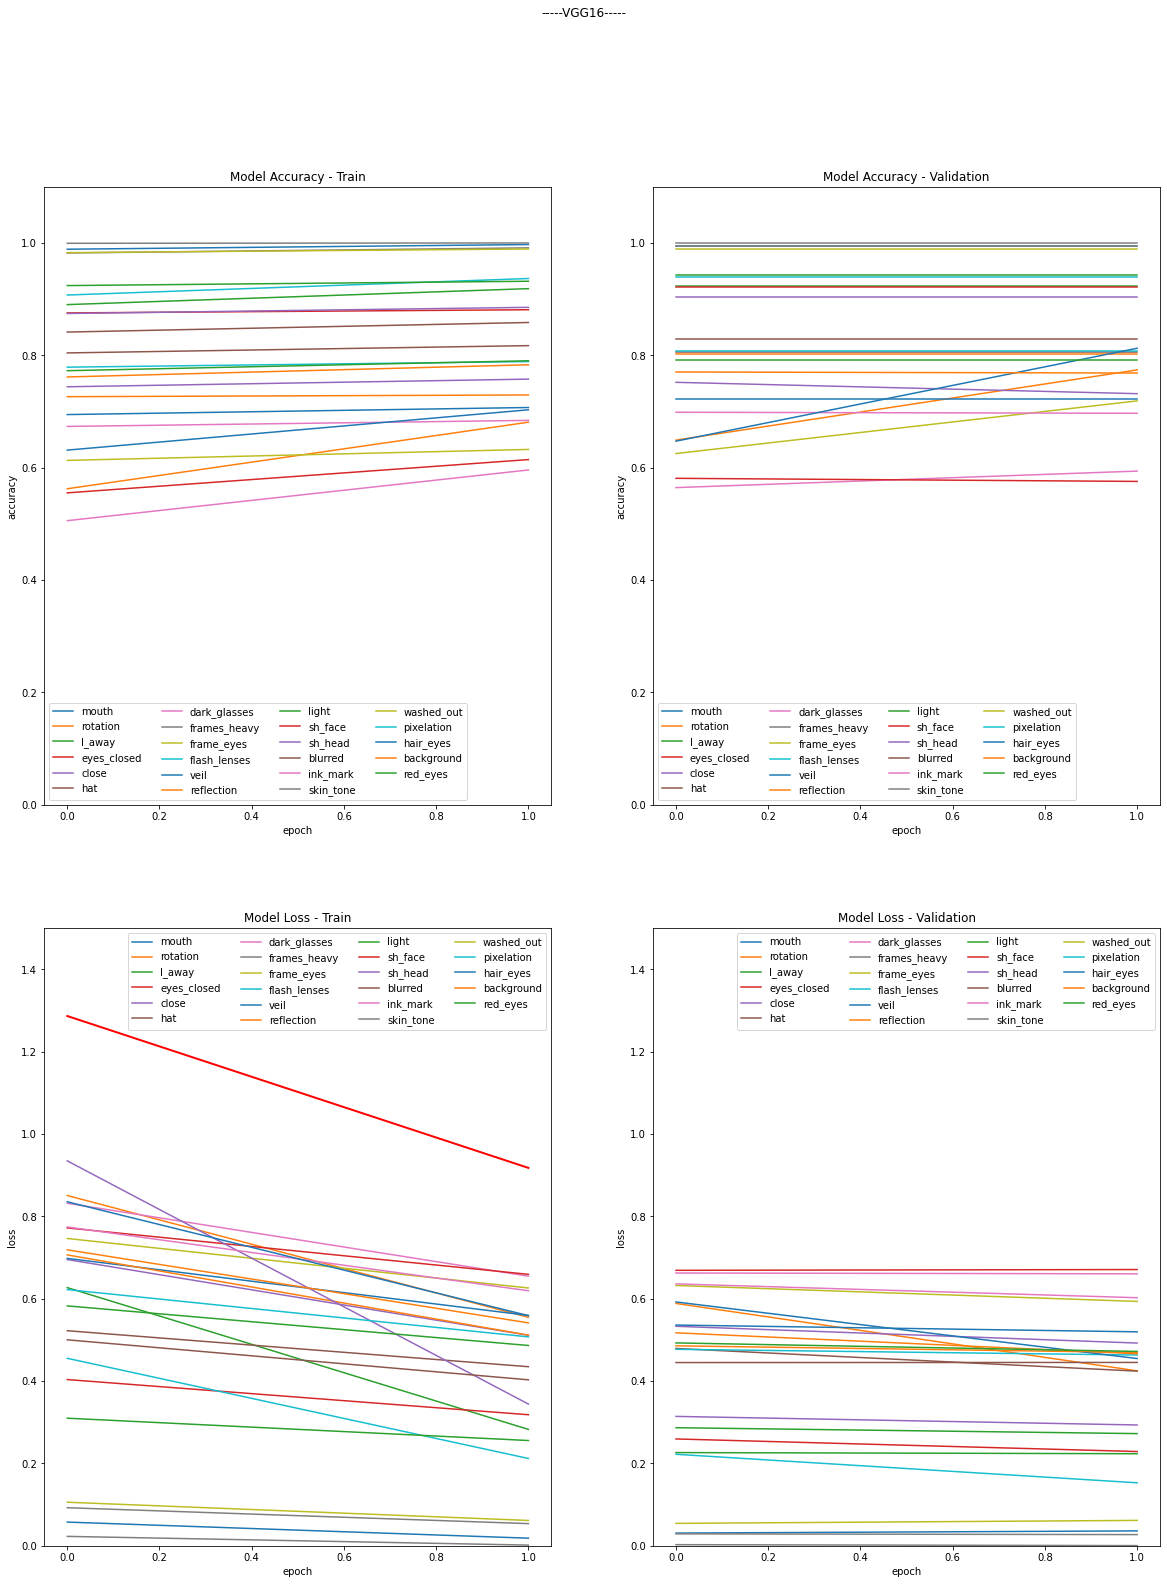

In [20]:
runner.draw_training_history()

# Load Best Model

In [15]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [16]:
runner.save_model()

-------------------- save model -------------------
Saving model
INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving process finished


# Test Trained Model

## Validation Split

Testing Trained Model
Predicting labels....
18/18 [==============================] - 32s 2s/step
Prediction finished!
Requisite: MOUTH


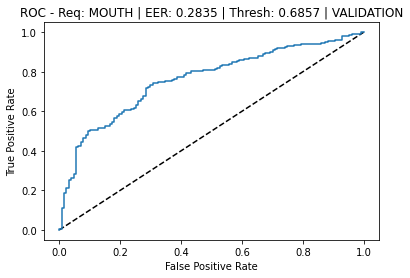

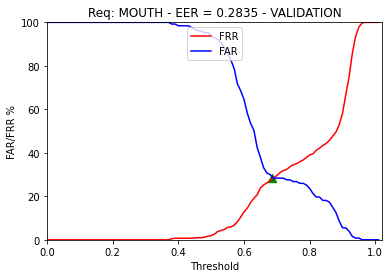

Requisite: MOUTH - EER_interp: 28.349999999999998% - Best Threshold: 0.685685515403619
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.44      0.72      0.54       127
    COMPLIANT       0.89      0.72      0.80       420

     accuracy                           0.72       547
    macro avg       0.66      0.72      0.67       547
 weighted avg       0.79      0.72      0.74       547

Confusion matrix ----------------------------------------
FAR: 28.349999999999998% | FRR: 28.1% | EER_mean: 28.22% | TP: 302 | TN: 91 | FP: 36 | FN: 118
Accuracy ------------------------------------------------
Model Accuracy: 71.85000000000001%
---------------------------------------------------------
Requisite: ROTATION


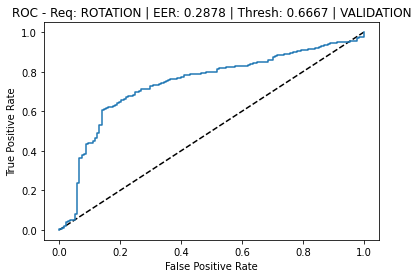

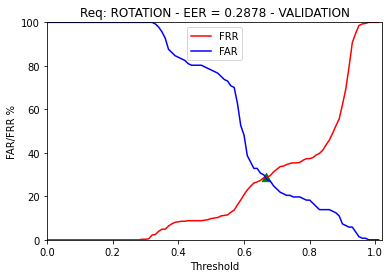

Requisite: ROTATION - EER_interp: 28.78% - Best Threshold: 0.6666584116656605
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.45      0.72      0.56       137
    COMPLIANT       0.88      0.71      0.79       410

     accuracy                           0.71       547
    macro avg       0.67      0.71      0.67       547
 weighted avg       0.77      0.71      0.73       547

Confusion matrix ----------------------------------------
FAR: 28.470000000000002% | FRR: 28.78% | EER_mean: 28.62% | TP: 292 | TN: 98 | FP: 39 | FN: 118
Accuracy ------------------------------------------------
Model Accuracy: 71.3%
---------------------------------------------------------
Requisite: L_AWAY


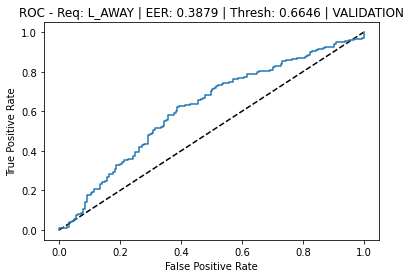

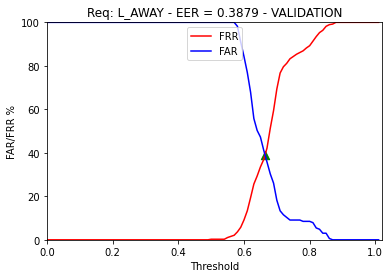

Requisite: L_AWAY - EER_interp: 38.79% - Best Threshold: 0.6645532846450226
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.41      0.61      0.49       165
    COMPLIANT       0.79      0.62      0.70       382

     accuracy                           0.62       547
    macro avg       0.60      0.62      0.59       547
 weighted avg       0.67      0.62      0.63       547

Confusion matrix ----------------------------------------
FAR: 38.79% | FRR: 37.7% | EER_mean: 38.24% | TP: 238 | TN: 101 | FP: 64 | FN: 144
Accuracy ------------------------------------------------
Model Accuracy: 61.970000000000006%
---------------------------------------------------------
Requisite: EYES_CLOSED


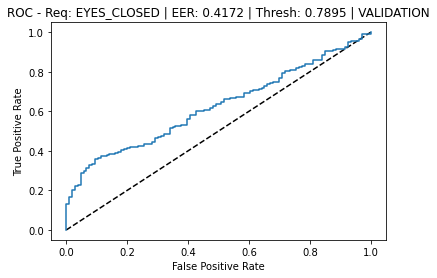

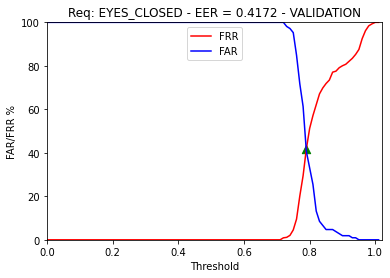

Requisite: EYES_CLOSED - EER_interp: 41.72% - Best Threshold: 0.7894541380627085
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.25      0.58      0.35       106
    COMPLIANT       0.85      0.58      0.69       441

     accuracy                           0.58       547
    macro avg       0.55      0.58      0.52       547
 weighted avg       0.74      0.58      0.63       547

Confusion matrix ----------------------------------------
FAR: 41.510000000000005% | FRR: 41.72% | EER_mean: 41.620000000000005% | TP: 257 | TN: 62 | FP: 44 | FN: 184
Accuracy ------------------------------------------------
Model Accuracy: 58.32000000000001%
---------------------------------------------------------
Requisite: CLOSE


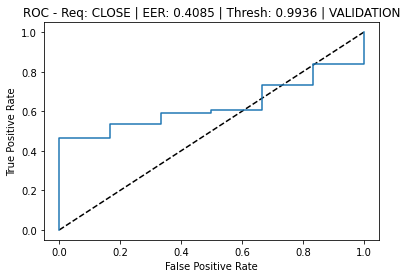

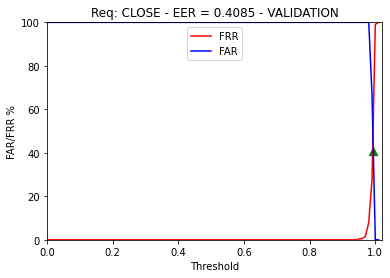

Requisite: CLOSE - EER_interp: 40.849999999999994% - Best Threshold: 0.9935580606601595
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.02      0.67      0.03         6
    COMPLIANT       0.99      0.59      0.74       541

     accuracy                           0.59       547
    macro avg       0.51      0.63      0.39       547
 weighted avg       0.98      0.59      0.73       547

Confusion matrix ----------------------------------------
FAR: 33.33% | FRR: 40.849999999999994% | EER_mean: 37.09% | TP: 320 | TN: 4 | FP: 2 | FN: 221
Accuracy ------------------------------------------------
Model Accuracy: 59.230000000000004%
---------------------------------------------------------
Requisite: HAT


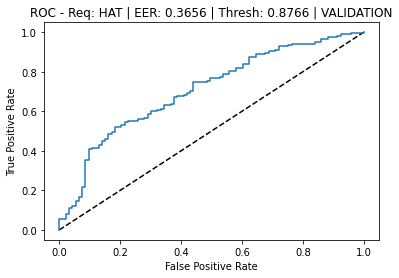

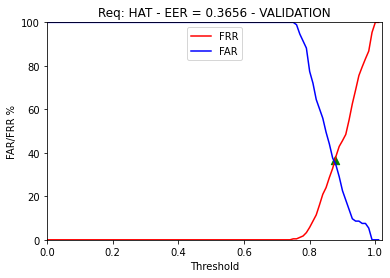

Requisite: HAT - EER_interp: 36.559999999999995% - Best Threshold: 0.87660318613047
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.26      0.63      0.37        93
    COMPLIANT       0.89      0.64      0.74       454

     accuracy                           0.64       547
    macro avg       0.58      0.64      0.56       547
 weighted avg       0.79      0.64      0.68       547

Confusion matrix ----------------------------------------
FAR: 36.559999999999995% | FRR: 36.34% | EER_mean: 36.449999999999996% | TP: 289 | TN: 59 | FP: 34 | FN: 165
Accuracy ------------------------------------------------
Model Accuracy: 63.62%
---------------------------------------------------------
Requisite: DARK_GLASSES


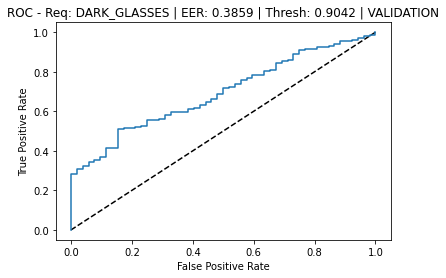

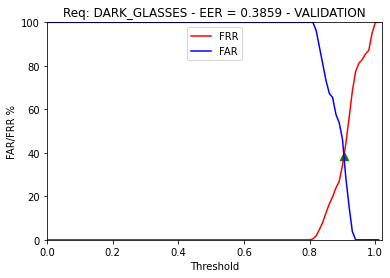

Requisite: DARK_GLASSES - EER_interp: 38.59% - Best Threshold: 0.9042420406534194
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.14      0.62      0.23        52
    COMPLIANT       0.94      0.61      0.74       495

     accuracy                           0.61       547
    macro avg       0.54      0.61      0.49       547
 weighted avg       0.86      0.61      0.69       547

Confusion matrix ----------------------------------------
FAR: 38.46% | FRR: 38.59% | EER_mean: 38.519999999999996% | TP: 304 | TN: 32 | FP: 20 | FN: 191
Accuracy ------------------------------------------------
Model Accuracy: 61.42999999999999%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


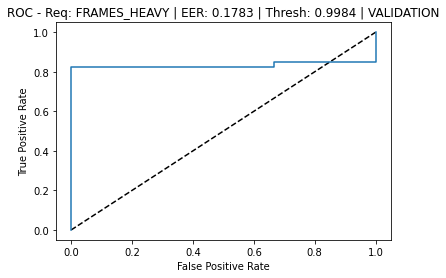

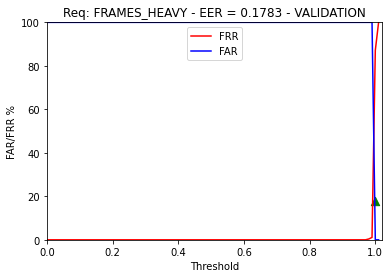

Requisite: FRAMES_HEAVY - EER_interp: 17.83% - Best Threshold: 0.9983723735546365
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.02      0.67      0.04         3
    COMPLIANT       1.00      0.82      0.90       544

     accuracy                           0.82       547
    macro avg       0.51      0.74      0.47       547
 weighted avg       0.99      0.82      0.90       547

Confusion matrix ----------------------------------------
FAR: 33.33% | FRR: 17.83% | EER_mean: 25.580000000000002% | TP: 447 | TN: 2 | FP: 1 | FN: 97
Accuracy ------------------------------------------------
Model Accuracy: 82.08%
---------------------------------------------------------
Requisite: FRAME_EYES


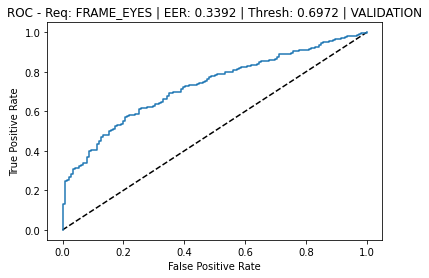

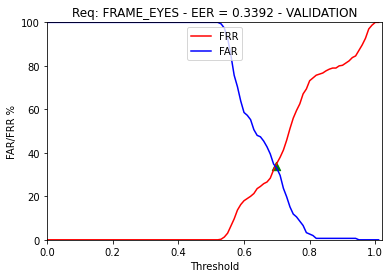

Requisite: FRAME_EYES - EER_interp: 33.92% - Best Threshold: 0.6971621341343177
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.43      0.66      0.52       152
    COMPLIANT       0.84      0.66      0.74       395

     accuracy                           0.66       547
    macro avg       0.63      0.66      0.63       547
 weighted avg       0.72      0.66      0.68       547

Confusion matrix ----------------------------------------
FAR: 33.550000000000004% | FRR: 33.92% | EER_mean: 33.739999999999995% | TP: 261 | TN: 101 | FP: 51 | FN: 134
Accuracy ------------------------------------------------
Model Accuracy: 66.18%
---------------------------------------------------------
Requisite: FLASH_LENSES


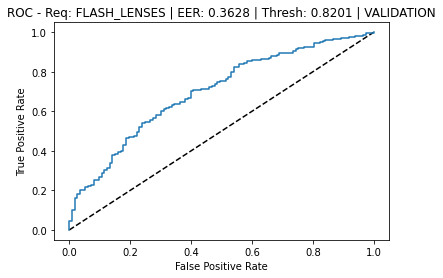

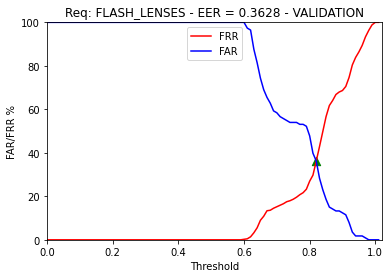

Requisite: FLASH_LENSES - EER_interp: 36.28% - Best Threshold: 0.8201183080673252
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.31      0.64      0.42       113
    COMPLIANT       0.87      0.64      0.74       434

     accuracy                           0.64       547
    macro avg       0.59      0.64      0.58       547
 weighted avg       0.76      0.64      0.67       547

Confusion matrix ----------------------------------------
FAR: 36.28% | FRR: 36.41% | EER_mean: 36.34% | TP: 276 | TN: 72 | FP: 41 | FN: 158
Accuracy ------------------------------------------------
Model Accuracy: 63.62%
---------------------------------------------------------
Requisite: VEIL


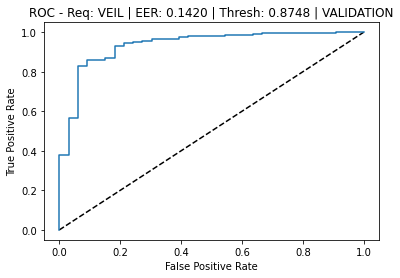

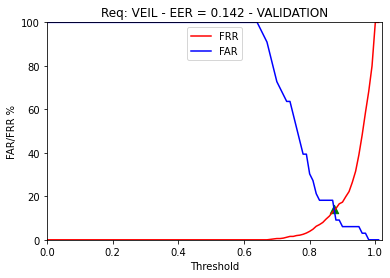

Requisite: VEIL - EER_interp: 14.2% - Best Threshold: 0.8747824552226159
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.28      0.88      0.43        33
    COMPLIANT       0.99      0.86      0.92       514

     accuracy                           0.86       547
    macro avg       0.64      0.87      0.67       547
 weighted avg       0.95      0.86      0.89       547

Confusion matrix ----------------------------------------
FAR: 12.120000000000001% | FRR: 14.2% | EER_mean: 13.16% | TP: 441 | TN: 29 | FP: 4 | FN: 73
Accuracy ------------------------------------------------
Model Accuracy: 85.92%
---------------------------------------------------------
Requisite: REFLECTION


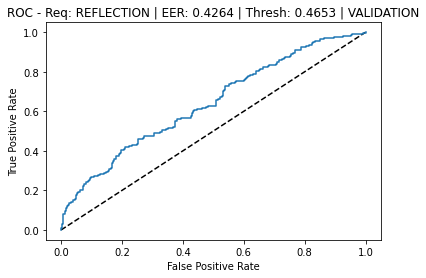

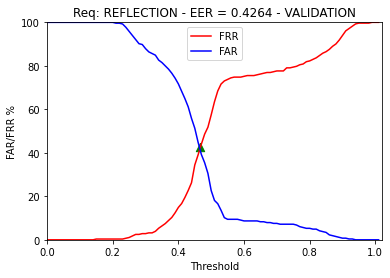

Requisite: REFLECTION - EER_interp: 42.64% - Best Threshold: 0.46530738472932914
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.56      0.57      0.57       265
    COMPLIANT       0.59      0.57      0.58       282

     accuracy                           0.57       547
    macro avg       0.57      0.57      0.57       547
 weighted avg       0.57      0.57      0.57       547

Confusion matrix ----------------------------------------
FAR: 42.64% | FRR: 42.55% | EER_mean: 42.6% | TP: 162 | TN: 152 | FP: 113 | FN: 120
Accuracy ------------------------------------------------
Model Accuracy: 57.4%
---------------------------------------------------------
Requisite: LIGHT


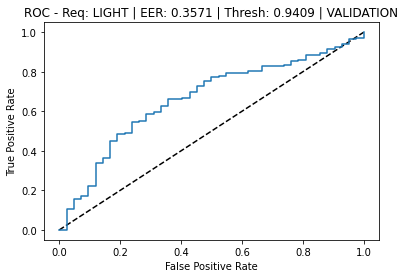

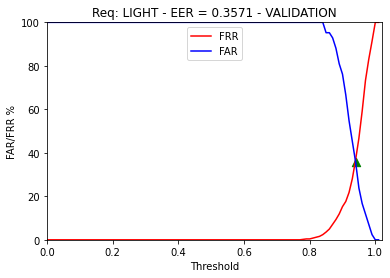

Requisite: LIGHT - EER_interp: 35.709999999999994% - Best Threshold: 0.9409299492836002
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.12      0.64      0.21        42
    COMPLIANT       0.95      0.63      0.76       505

     accuracy                           0.63       547
    macro avg       0.54      0.63      0.48       547
 weighted avg       0.89      0.63      0.71       547

Confusion matrix ----------------------------------------
FAR: 35.709999999999994% | FRR: 37.43% | EER_mean: 36.57% | TP: 316 | TN: 27 | FP: 15 | FN: 189
Accuracy ------------------------------------------------
Model Accuracy: 62.71%
---------------------------------------------------------
Requisite: SH_FACE


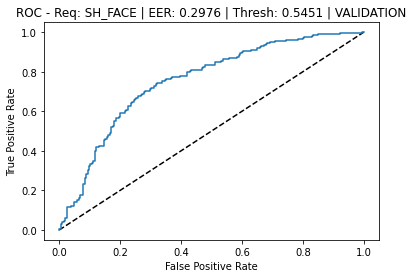

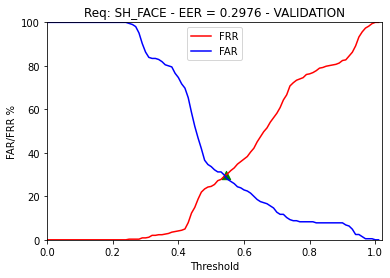

Requisite: SH_FACE - EER_interp: 29.759999999999998% - Best Threshold: 0.5451377630236395
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.59      0.70      0.64       205
    COMPLIANT       0.80      0.70      0.75       342

     accuracy                           0.70       547
    macro avg       0.69      0.70      0.69       547
 weighted avg       0.72      0.70      0.71       547

Confusion matrix ----------------------------------------
FAR: 29.759999999999998% | FRR: 29.82% | EER_mean: 29.79% | TP: 240 | TN: 144 | FP: 61 | FN: 102
Accuracy ------------------------------------------------
Model Accuracy: 70.19999999999999%
---------------------------------------------------------
Requisite: SH_HEAD


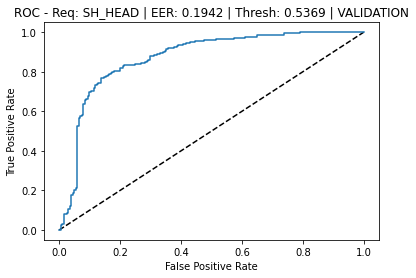

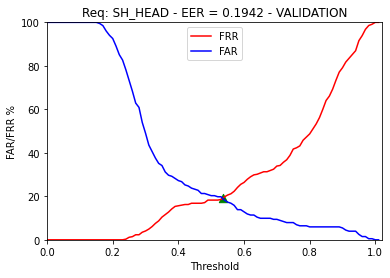

Requisite: SH_HEAD - EER_interp: 19.42% - Best Threshold: 0.5368631824203159
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.71      0.81      0.76       202
    COMPLIANT       0.88      0.81      0.84       345

     accuracy                           0.81       547
    macro avg       0.79      0.81      0.80       547
 weighted avg       0.82      0.81      0.81       547

Confusion matrix ----------------------------------------
FAR: 18.81% | FRR: 19.42% | EER_mean: 19.11% | TP: 278 | TN: 164 | FP: 38 | FN: 67
Accuracy ------------------------------------------------
Model Accuracy: 80.80000000000001%
---------------------------------------------------------
Requisite: BLURRED


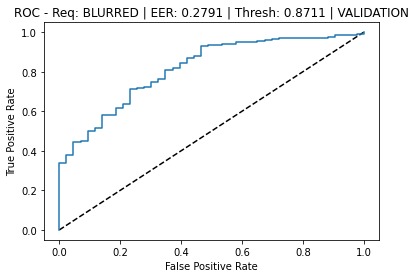

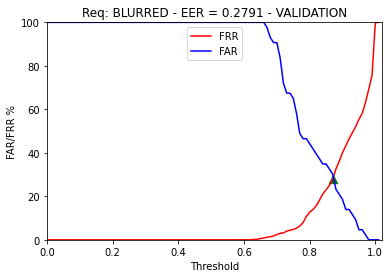

Requisite: BLURRED - EER_interp: 27.91% - Best Threshold: 0.8710551857948431
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.18      0.72      0.29        43
    COMPLIANT       0.97      0.72      0.83       504

     accuracy                           0.72       547
    macro avg       0.57      0.72      0.56       547
 weighted avg       0.91      0.72      0.78       547

Confusion matrix ----------------------------------------
FAR: 27.91% | FRR: 27.98% | EER_mean: 27.939999999999998% | TP: 363 | TN: 31 | FP: 12 | FN: 141
Accuracy ------------------------------------------------
Model Accuracy: 72.03%
---------------------------------------------------------
Requisite: SKIN_TONE


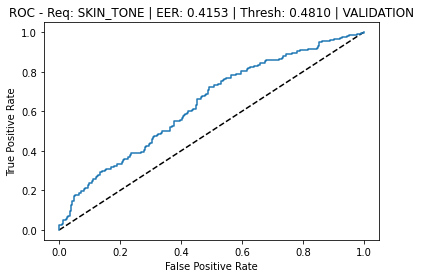

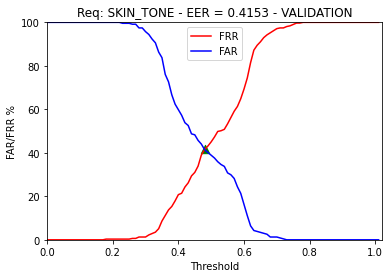

Requisite: SKIN_TONE - EER_interp: 41.53% - Best Threshold: 0.4810041165389998
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.51      0.59      0.55       234
    COMPLIANT       0.65      0.58      0.62       313

     accuracy                           0.59       547
    macro avg       0.58      0.59      0.58       547
 weighted avg       0.59      0.59      0.59       547

Confusion matrix ----------------------------------------
FAR: 41.449999999999996% | FRR: 41.53% | EER_mean: 41.49% | TP: 183 | TN: 137 | FP: 97 | FN: 130
Accuracy ------------------------------------------------
Model Accuracy: 58.5%
---------------------------------------------------------
Requisite: WASHED_OUT


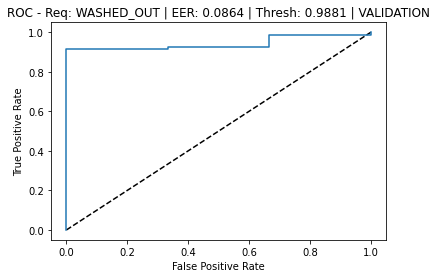

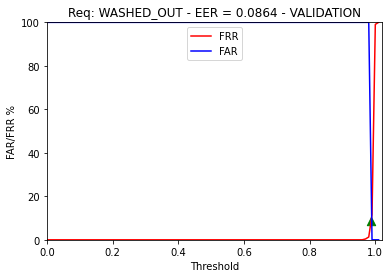

Requisite: WASHED_OUT - EER_interp: 8.64% - Best Threshold: 0.9881462320027983
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.06      1.00      0.11         3
    COMPLIANT       1.00      0.91      0.95       544

     accuracy                           0.91       547
    macro avg       0.53      0.96      0.53       547
 weighted avg       0.99      0.91      0.95       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 8.64% | EER_mean: 4.32% | TP: 497 | TN: 3 | FP: 0 | FN: 47
Accuracy ------------------------------------------------
Model Accuracy: 91.41%
---------------------------------------------------------
Requisite: PIXELATION


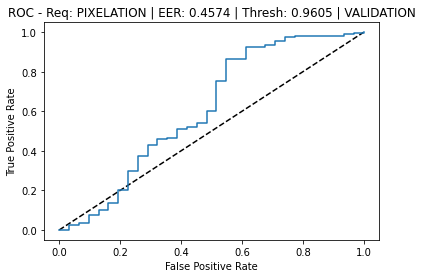

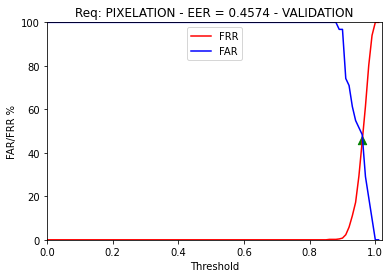

Requisite: PIXELATION - EER_interp: 45.739999999999995% - Best Threshold: 0.9604794096577075
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.07      0.55      0.12        31
    COMPLIANT       0.95      0.54      0.69       516

     accuracy                           0.54       547
    macro avg       0.51      0.55      0.41       547
 weighted avg       0.90      0.54      0.66       547

Confusion matrix ----------------------------------------
FAR: 45.16% | FRR: 45.739999999999995% | EER_mean: 45.45% | TP: 280 | TN: 17 | FP: 14 | FN: 236
Accuracy ------------------------------------------------
Model Accuracy: 54.300000000000004%
---------------------------------------------------------
Requisite: HAIR_EYES


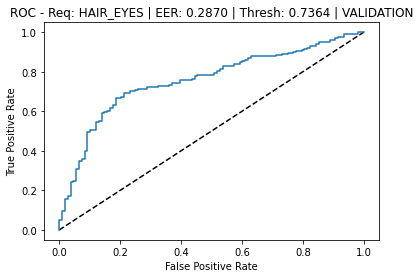

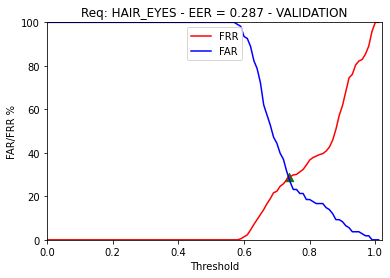

Requisite: HAIR_EYES - EER_interp: 28.7% - Best Threshold: 0.7363918528198387
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.38      0.72      0.50       108
    COMPLIANT       0.91      0.71      0.80       439

     accuracy                           0.71       547
    macro avg       0.65      0.72      0.65       547
 weighted avg       0.81      0.71      0.74       547

Confusion matrix ----------------------------------------
FAR: 27.779999999999998% | FRR: 28.7% | EER_mean: 28.24% | TP: 313 | TN: 78 | FP: 30 | FN: 126
Accuracy ------------------------------------------------
Model Accuracy: 71.48%
---------------------------------------------------------
Requisite: BACKGROUND


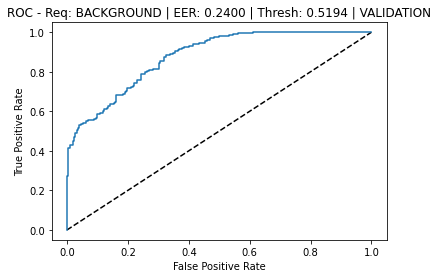

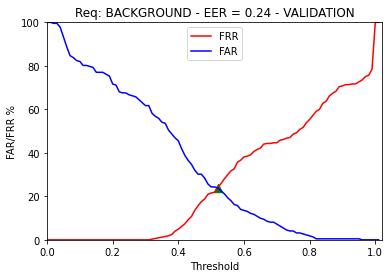

Requisite: BACKGROUND - EER_interp: 24.0% - Best Threshold: 0.5193569397926333
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.68      0.76      0.72       222
    COMPLIANT       0.82      0.76      0.79       325

     accuracy                           0.76       547
    macro avg       0.75      0.76      0.76       547
 weighted avg       0.77      0.76      0.76       547

Confusion matrix ----------------------------------------
FAR: 23.87% | FRR: 24.0% | EER_mean: 23.94% | TP: 247 | TN: 169 | FP: 53 | FN: 78
Accuracy ------------------------------------------------
Model Accuracy: 76.05%
---------------------------------------------------------
Requisite: RED_EYES


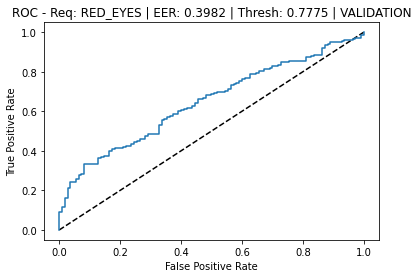

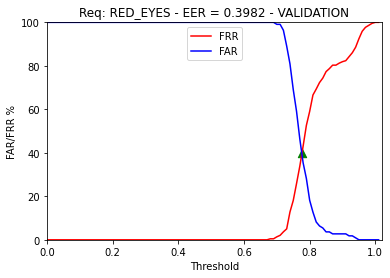

Requisite: RED_EYES - EER_interp: 39.82% - Best Threshold: 0.7774856280134799
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.28      0.61      0.38       110
    COMPLIANT       0.86      0.60      0.71       437

     accuracy                           0.60       547
    macro avg       0.57      0.61      0.54       547
 weighted avg       0.74      0.60      0.64       547

Confusion matrix ----------------------------------------
FAR: 39.09% | FRR: 39.82% | EER_mean: 39.46% | TP: 263 | TN: 67 | FP: 43 | FN: 174
Accuracy ------------------------------------------------
Model Accuracy: 60.33%
---------------------------------------------------------


In [17]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

Testing Trained Model
Predicting labels....
9/9 [==============================] - 21s 3s/step
Prediction finished!
Requisite: MOUTH


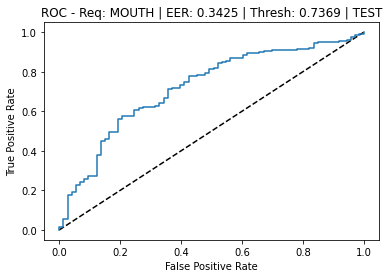

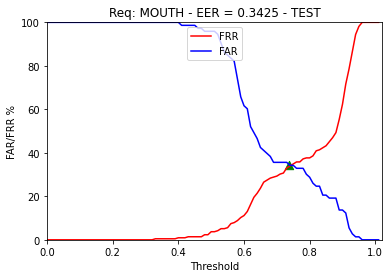

Requisite: MOUTH - EER_interp: 34.25% - Best Threshold: 0.7368643283843936
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.40      0.66      0.50        73
    COMPLIANT       0.85      0.67      0.75       215

     accuracy                           0.67       288
    macro avg       0.63      0.66      0.62       288
 weighted avg       0.74      0.67      0.69       288

Confusion matrix ----------------------------------------
FAR: 34.25% | FRR: 33.019999999999996% | EER_mean: 33.64% | TP: 144 | TN: 48 | FP: 25 | FN: 71
Accuracy ------------------------------------------------
Model Accuracy: 66.67%
---------------------------------------------------------
Requisite: ROTATION


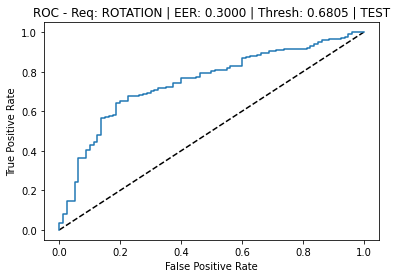

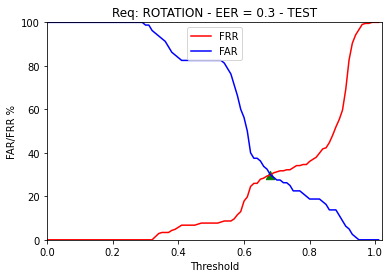

Requisite: ROTATION - EER_interp: 30.0% - Best Threshold: 0.6804859042167615
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.47      0.70      0.57        80
    COMPLIANT       0.86      0.70      0.77       208

     accuracy                           0.70       288
    macro avg       0.67      0.70      0.67       288
 weighted avg       0.75      0.70      0.72       288

Confusion matrix ----------------------------------------
FAR: 30.0% | FRR: 29.81% | EER_mean: 29.9% | TP: 146 | TN: 56 | FP: 24 | FN: 62
Accuracy ------------------------------------------------
Model Accuracy: 70.14%
---------------------------------------------------------
Requisite: L_AWAY


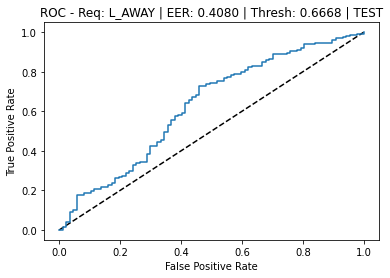

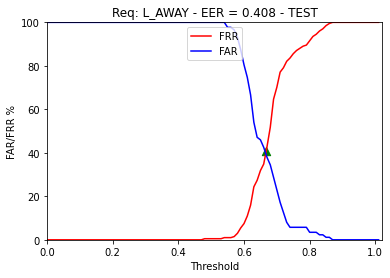

Requisite: L_AWAY - EER_interp: 40.8% - Best Threshold: 0.6667691113343864
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.39      0.60      0.47        87
    COMPLIANT       0.77      0.59      0.67       201

     accuracy                           0.59       288
    macro avg       0.58      0.59      0.57       288
 weighted avg       0.66      0.59      0.61       288

Confusion matrix ----------------------------------------
FAR: 40.23% | FRR: 40.8% | EER_mean: 40.52% | TP: 119 | TN: 52 | FP: 35 | FN: 82
Accuracy ------------------------------------------------
Model Accuracy: 59.38%
---------------------------------------------------------
Requisite: EYES_CLOSED


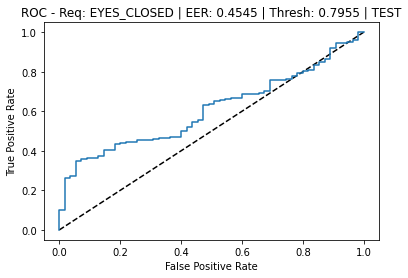

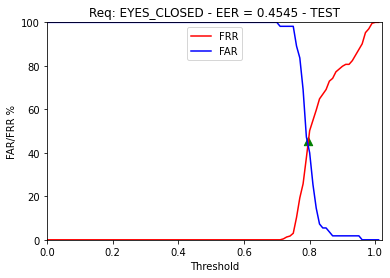

Requisite: EYES_CLOSED - EER_interp: 45.45% - Best Threshold: 0.7955462336540269
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.22      0.55      0.31        55
    COMPLIANT       0.84      0.55      0.66       233

     accuracy                           0.55       288
    macro avg       0.53      0.55      0.49       288
 weighted avg       0.72      0.55      0.59       288

Confusion matrix ----------------------------------------
FAR: 45.45% | FRR: 45.49% | EER_mean: 45.47% | TP: 127 | TN: 30 | FP: 25 | FN: 106
Accuracy ------------------------------------------------
Model Accuracy: 54.510000000000005%
---------------------------------------------------------
Requisite: CLOSE


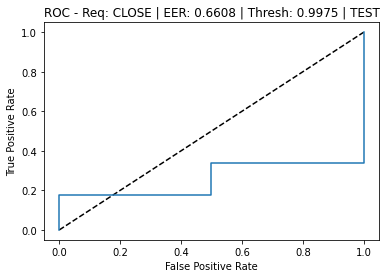

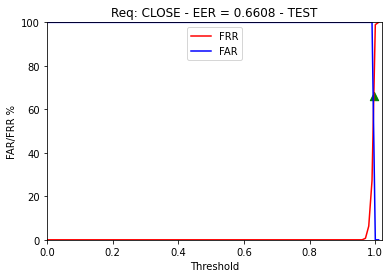

Requisite: CLOSE - EER_interp: 66.08000000000001% - Best Threshold: 0.9974985672877386
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.01      0.50      0.01         2
    COMPLIANT       0.99      0.34      0.51       286

     accuracy                           0.34       288
    macro avg       0.50      0.42      0.26       288
 weighted avg       0.98      0.34      0.50       288

Confusion matrix ----------------------------------------
FAR: 50.0% | FRR: 66.08000000000001% | EER_mean: 58.040000000000006% | TP: 97 | TN: 1 | FP: 1 | FN: 189
Accuracy ------------------------------------------------
Model Accuracy: 34.03%
---------------------------------------------------------
Requisite: HAT


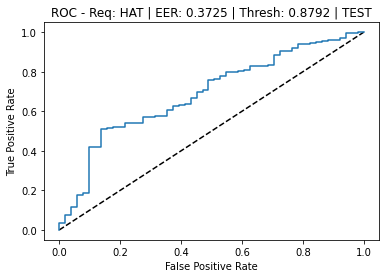

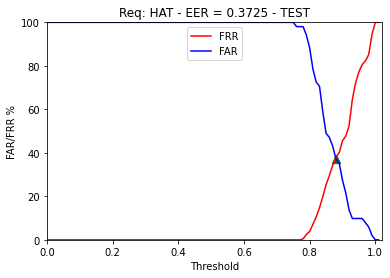

Requisite: HAT - EER_interp: 37.25% - Best Threshold: 0.8791979551314887
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.27      0.63      0.37        51
    COMPLIANT       0.89      0.63      0.74       237

     accuracy                           0.63       288
    macro avg       0.58      0.63      0.56       288
 weighted avg       0.78      0.63      0.67       288

Confusion matrix ----------------------------------------
FAR: 37.25% | FRR: 37.13% | EER_mean: 37.19% | TP: 149 | TN: 32 | FP: 19 | FN: 88
Accuracy ------------------------------------------------
Model Accuracy: 62.849999999999994%
---------------------------------------------------------
Requisite: DARK_GLASSES


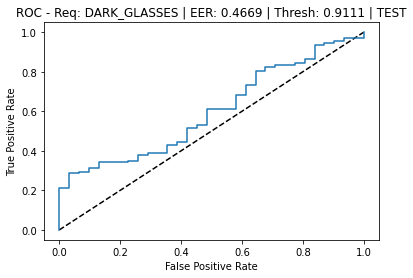

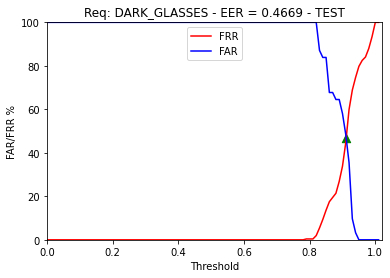

Requisite: DARK_GLASSES - EER_interp: 46.69% - Best Threshold: 0.9111147942710015
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.12      0.55      0.20        31
    COMPLIANT       0.91      0.53      0.67       257

     accuracy                           0.53       288
    macro avg       0.52      0.54      0.44       288
 weighted avg       0.82      0.53      0.62       288

Confusion matrix ----------------------------------------
FAR: 45.16% | FRR: 46.69% | EER_mean: 45.92% | TP: 137 | TN: 17 | FP: 14 | FN: 120
Accuracy ------------------------------------------------
Model Accuracy: 53.47%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


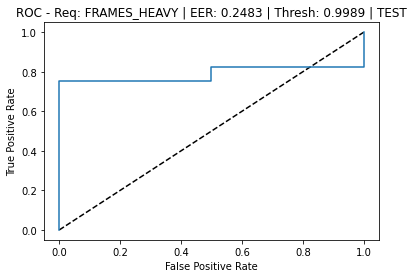

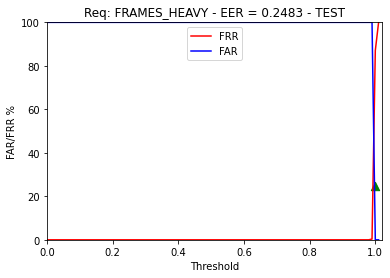

Requisite: FRAMES_HEAVY - EER_interp: 24.83% - Best Threshold: 0.998899000924784
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.03      1.00      0.05         2
    COMPLIANT       1.00      0.75      0.86       286

     accuracy                           0.75       288
    macro avg       0.51      0.88      0.46       288
 weighted avg       0.99      0.75      0.85       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 24.83% | EER_mean: 12.42% | TP: 215 | TN: 2 | FP: 0 | FN: 71
Accuracy ------------------------------------------------
Model Accuracy: 75.35%
---------------------------------------------------------
Requisite: FRAME_EYES


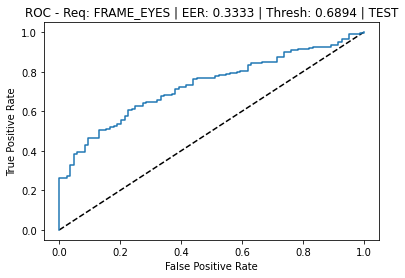

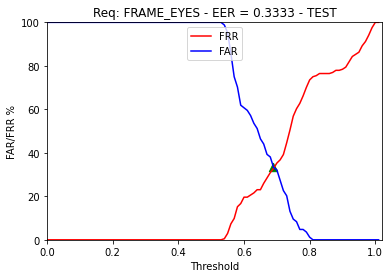

Requisite: FRAME_EYES - EER_interp: 33.33% - Best Threshold: 0.6894174218177572
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.46      0.67      0.54        84
    COMPLIANT       0.83      0.68      0.75       204

     accuracy                           0.67       288
    macro avg       0.65      0.67      0.64       288
 weighted avg       0.72      0.67      0.69       288

Confusion matrix ----------------------------------------
FAR: 33.33% | FRR: 32.35% | EER_mean: 32.84% | TP: 138 | TN: 56 | FP: 28 | FN: 66
Accuracy ------------------------------------------------
Model Accuracy: 67.36%
---------------------------------------------------------
Requisite: FLASH_LENSES


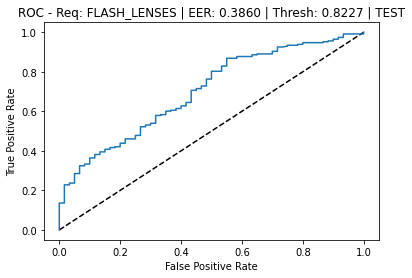

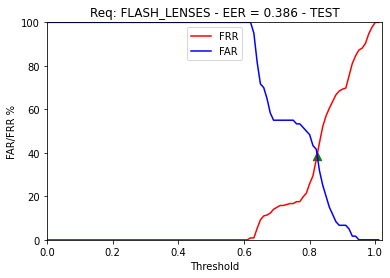

Requisite: FLASH_LENSES - EER_interp: 38.6% - Best Threshold: 0.8227215377908077
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.30      0.62      0.40        60
    COMPLIANT       0.86      0.61      0.72       228

     accuracy                           0.61       288
    macro avg       0.58      0.62      0.56       288
 weighted avg       0.74      0.61      0.65       288

Confusion matrix ----------------------------------------
FAR: 38.33% | FRR: 38.6% | EER_mean: 38.46% | TP: 140 | TN: 37 | FP: 23 | FN: 88
Accuracy ------------------------------------------------
Model Accuracy: 61.46%
---------------------------------------------------------
Requisite: VEIL


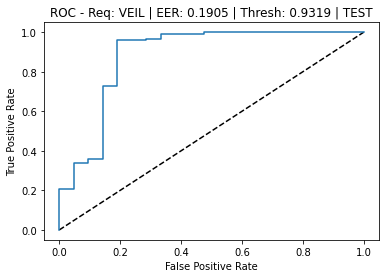

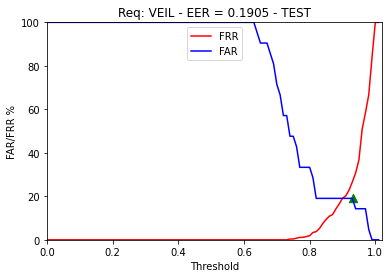

Requisite: VEIL - EER_interp: 19.05% - Best Threshold: 0.9318886399269228
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.19      0.81      0.31        21
    COMPLIANT       0.98      0.73      0.84       267

     accuracy                           0.74       288
    macro avg       0.59      0.77      0.57       288
 weighted avg       0.92      0.74      0.80       288

Confusion matrix ----------------------------------------
FAR: 19.05% | FRR: 26.97% | EER_mean: 23.01% | TP: 195 | TN: 17 | FP: 4 | FN: 72
Accuracy ------------------------------------------------
Model Accuracy: 73.61%
---------------------------------------------------------
Requisite: REFLECTION


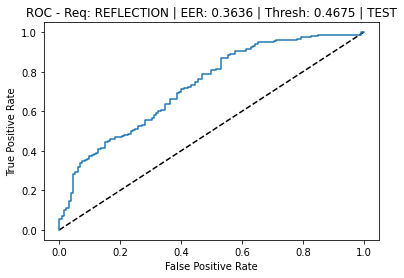

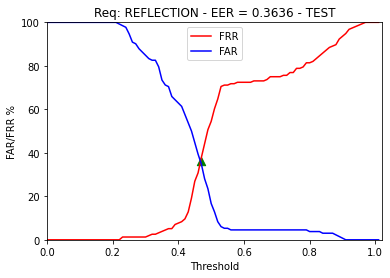

Requisite: REFLECTION - EER_interp: 36.36% - Best Threshold: 0.4674744606018464
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.60      0.64      0.62       132
    COMPLIANT       0.67      0.63      0.65       156

     accuracy                           0.64       288
    macro avg       0.63      0.64      0.63       288
 weighted avg       0.64      0.64      0.64       288

Confusion matrix ----------------------------------------
FAR: 36.36% | FRR: 36.54% | EER_mean: 36.449999999999996% | TP: 99 | TN: 84 | FP: 48 | FN: 57
Accuracy ------------------------------------------------
Model Accuracy: 63.54%
---------------------------------------------------------
Requisite: LIGHT


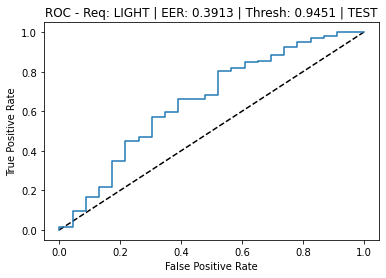

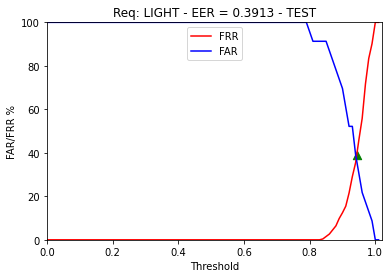

Requisite: LIGHT - EER_interp: 39.129999999999995% - Best Threshold: 0.9450985789299156
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.12      0.61      0.19        23
    COMPLIANT       0.95      0.60      0.73       265

     accuracy                           0.60       288
    macro avg       0.53      0.60      0.46       288
 weighted avg       0.88      0.60      0.69       288

Confusion matrix ----------------------------------------
FAR: 39.129999999999995% | FRR: 40.38% | EER_mean: 39.75% | TP: 158 | TN: 14 | FP: 9 | FN: 107
Accuracy ------------------------------------------------
Model Accuracy: 59.72%
---------------------------------------------------------
Requisite: SH_FACE


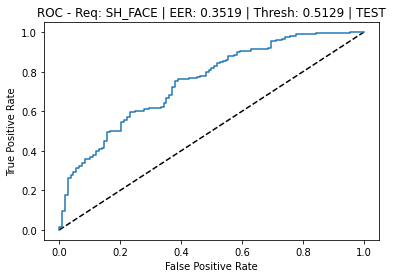

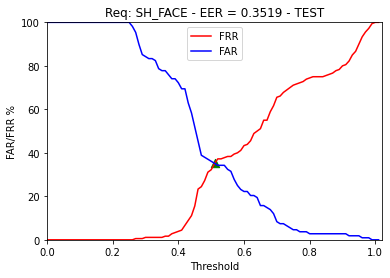

Requisite: SH_FACE - EER_interp: 35.19% - Best Threshold: 0.5129231810576911
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.52      0.65      0.58       108
    COMPLIANT       0.75      0.64      0.69       180

     accuracy                           0.65       288
    macro avg       0.64      0.65      0.64       288
 weighted avg       0.67      0.65      0.65       288

Confusion matrix ----------------------------------------
FAR: 35.19% | FRR: 35.56% | EER_mean: 35.38% | TP: 116 | TN: 70 | FP: 38 | FN: 64
Accuracy ------------------------------------------------
Model Accuracy: 64.58%
---------------------------------------------------------
Requisite: SH_HEAD


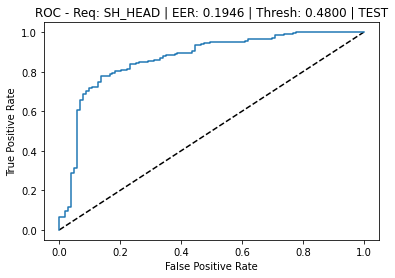

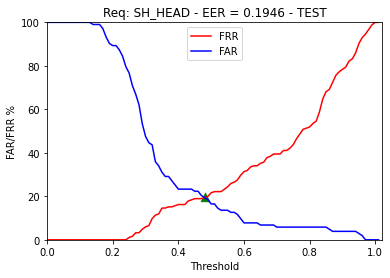

Requisite: SH_HEAD - EER_interp: 19.46% - Best Threshold: 0.47996355673735097
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.70      0.81      0.75       103
    COMPLIANT       0.88      0.81      0.84       185

     accuracy                           0.81       288
    macro avg       0.79      0.81      0.79       288
 weighted avg       0.82      0.81      0.81       288

Confusion matrix ----------------------------------------
FAR: 19.42% | FRR: 19.46% | EER_mean: 19.439999999999998% | TP: 149 | TN: 83 | FP: 20 | FN: 36
Accuracy ------------------------------------------------
Model Accuracy: 80.56%
---------------------------------------------------------
Requisite: BLURRED


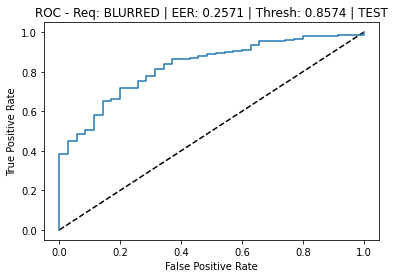

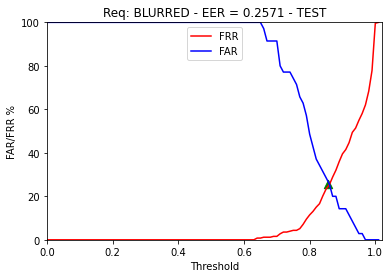

Requisite: BLURRED - EER_interp: 25.71% - Best Threshold: 0.8573725223539598
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.29      0.74      0.42        35
    COMPLIANT       0.95      0.75      0.84       253

     accuracy                           0.75       288
    macro avg       0.62      0.75      0.63       288
 weighted avg       0.87      0.75      0.79       288

Confusion matrix ----------------------------------------
FAR: 25.71% | FRR: 24.9% | EER_mean: 25.3% | TP: 190 | TN: 26 | FP: 9 | FN: 63
Accuracy ------------------------------------------------
Model Accuracy: 75.0%
---------------------------------------------------------
Requisite: SKIN_TONE


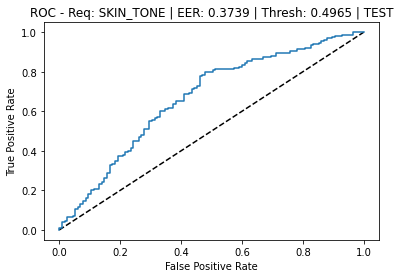

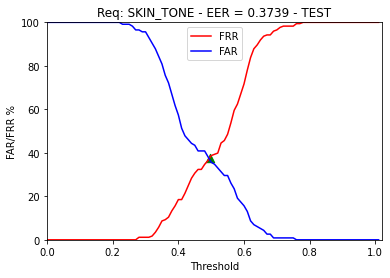

Requisite: SKIN_TONE - EER_interp: 37.39% - Best Threshold: 0.49654921889305975
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.52      0.63      0.57       115
    COMPLIANT       0.71      0.62      0.66       173

     accuracy                           0.62       288
    macro avg       0.62      0.62      0.62       288
 weighted avg       0.64      0.62      0.63       288

Confusion matrix ----------------------------------------
FAR: 37.39% | FRR: 38.15% | EER_mean: 37.769999999999996% | TP: 107 | TN: 72 | FP: 43 | FN: 66
Accuracy ------------------------------------------------
Model Accuracy: 62.150000000000006%
---------------------------------------------------------
Requisite: WASHED_OUT


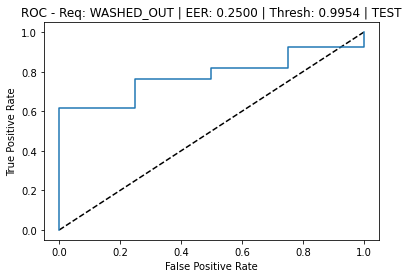

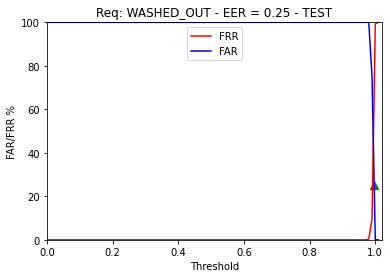

Requisite: WASHED_OUT - EER_interp: 25.0% - Best Threshold: 0.9953984618186951
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.04      0.75      0.08         4
    COMPLIANT       1.00      0.76      0.86       284

     accuracy                           0.76       288
    macro avg       0.52      0.76      0.47       288
 weighted avg       0.98      0.76      0.85       288

Confusion matrix ----------------------------------------
FAR: 25.0% | FRR: 23.59% | EER_mean: 24.3% | TP: 217 | TN: 3 | FP: 1 | FN: 67
Accuracy ------------------------------------------------
Model Accuracy: 76.39%
---------------------------------------------------------
Requisite: PIXELATION


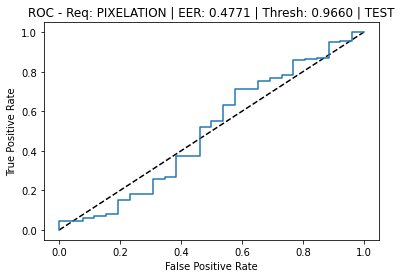

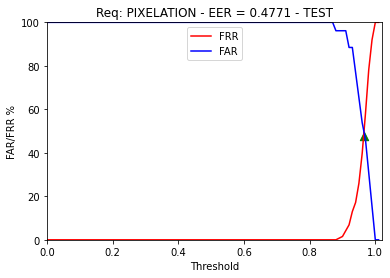

Requisite: PIXELATION - EER_interp: 47.71% - Best Threshold: 0.9660355284923815
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.10      0.54      0.17        26
    COMPLIANT       0.92      0.52      0.67       262

     accuracy                           0.52       288
    macro avg       0.51      0.53      0.42       288
 weighted avg       0.85      0.52      0.62       288

Confusion matrix ----------------------------------------
FAR: 46.150000000000006% | FRR: 47.71% | EER_mean: 46.93% | TP: 137 | TN: 14 | FP: 12 | FN: 125
Accuracy ------------------------------------------------
Model Accuracy: 52.43%
---------------------------------------------------------
Requisite: HAIR_EYES


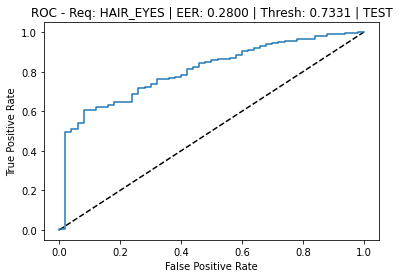

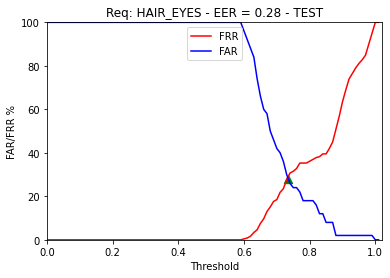

Requisite: HAIR_EYES - EER_interp: 28.000000000000004% - Best Threshold: 0.7331299781799472
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.35      0.72      0.47        50
    COMPLIANT       0.92      0.72      0.81       238

     accuracy                           0.72       288
    macro avg       0.64      0.72      0.64       288
 weighted avg       0.82      0.72      0.75       288

Confusion matrix ----------------------------------------
FAR: 28.000000000000004% | FRR: 28.15% | EER_mean: 28.08% | TP: 171 | TN: 36 | FP: 14 | FN: 67
Accuracy ------------------------------------------------
Model Accuracy: 71.88%
---------------------------------------------------------
Requisite: BACKGROUND


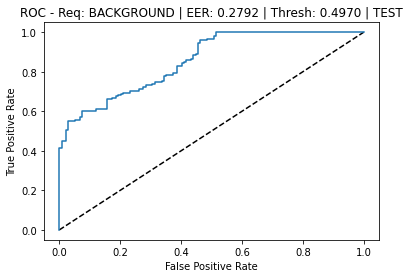

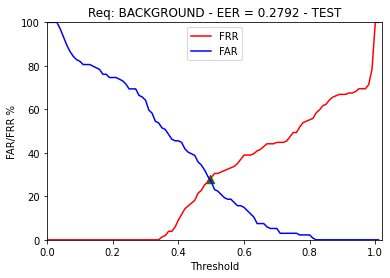

Requisite: BACKGROUND - EER_interp: 27.92% - Best Threshold: 0.49701376162566174
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.69      0.72      0.71       134
    COMPLIANT       0.75      0.72      0.74       154

     accuracy                           0.72       288
    macro avg       0.72      0.72      0.72       288
 weighted avg       0.72      0.72      0.72       288

Confusion matrix ----------------------------------------
FAR: 27.61% | FRR: 27.92% | EER_mean: 27.76% | TP: 111 | TN: 97 | FP: 37 | FN: 43
Accuracy ------------------------------------------------
Model Accuracy: 72.22%
---------------------------------------------------------
Requisite: RED_EYES


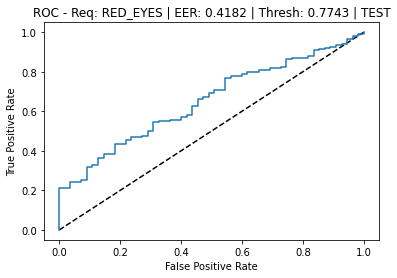

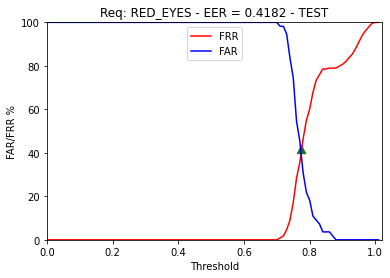

Requisite: RED_EYES - EER_interp: 41.82% - Best Threshold: 0.7743251323699898
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.25      0.58      0.35        55
    COMPLIANT       0.86      0.58      0.69       233

     accuracy                           0.58       288
    macro avg       0.55      0.58      0.52       288
 weighted avg       0.74      0.58      0.63       288

Confusion matrix ----------------------------------------
FAR: 41.82% | FRR: 41.63% | EER_mean: 41.72% | TP: 136 | TN: 32 | FP: 23 | FN: 97
Accuracy ------------------------------------------------
Model Accuracy: 58.330000000000005%
---------------------------------------------------------


In [18]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Vizualize Model Classification

# Finishing Experiment Manager

In [19]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Not using Neptune
